In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Exploration and Understanding
**Initial Inspection :**
df - train dataset and df1 - test dataset

In [2]:
# Import the pandas library to work with data
import pandas as pd

# Load the training data from a CSV file into a DataFrame called 'df'
df = pd.read_csv(r'C:\Users\hp\OneDrive\Pictures\guvi certificates\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\GUIDE_Train_file\GUIDE_train.csv')

# Load the testing data from another CSV file into a DataFrame called 'df1'
# Use 'low_memory=False' to handle large files without mixed data type warnings
df1 = pd.read_csv(r'C:\Users\hp\OneDrive\Pictures\guvi certificates\Microsoft  Classifying Cybersecurity Incidents with Machine Learning\GUIDE_Test_file\GUIDE_Test.csv', low_memory=False)

In [3]:
# Initial Inspection
# 1. Display the first few rows of the dataset to get an overview
print("First few rows of the dataset (train):")

# Display the first few rows of the DataFrame as a string
print(df.head().to_string(index=False))

First few rows of the dataset (train):
           Id  OrgId  IncidentId  AlertId                Timestamp  DetectorId  AlertTitle          Category MitreTechniques  IncidentGrade ActionGrouped ActionGranular EntityType EvidenceRole  DeviceId  Sha256  IpAddress    Url  AccountSid  AccountUpn  AccountObjectId  AccountName  DeviceName  NetworkMessageId  EmailClusterId  RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId ThreatFamily  FileName  FolderPath  ResourceIdName ResourceType Roles  OSFamily  OSVersion AntispamDirection SuspicionLevel LastVerdict  CountryCode  State  City
 180388628218      0         612   123247 2024-06-04T06:05:15.000Z           7           6     InitialAccess             NaN   TruePositive           NaN            NaN         Ip      Related     98799  138268         27 160396      441377      673934           425863       453297      153085            529644             NaN         1631                635       

In [4]:
print("First few rows of the dataset(test):")
# Display the first few rows of the DataFrame as a string
print(df1.head().to_string(index=False))

First few rows of the dataset(test):
           Id  OrgId  IncidentId  AlertId                Timestamp  DetectorId  AlertTitle          Category                 MitreTechniques  IncidentGrade ActionGrouped ActionGranular        EntityType EvidenceRole  DeviceId  Sha256  IpAddress    Url  AccountSid  AccountUpn  AccountObjectId  AccountName  DeviceName  NetworkMessageId  EmailClusterId  RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId ThreatFamily  FileName  FolderPath  ResourceIdName ResourceType      Roles  OSFamily  OSVersion AntispamDirection SuspicionLevel LastVerdict  CountryCode  State  City   Usage
1245540519230    657       11767    87199 2024-06-04T22:56:27.000Z         524         563   LateralMovement     T1021;T1047;T1105;T1569.002 BenignPositive           NaN            NaN              User     Impacted     98799  138268     360606 160396        2610        3699           425863          863      153085            5296

In [5]:
# 2. Check the structure of the dataset (number of rows and columns)
print("\nDataset shape - (train) (rows, columns):", df.shape)
print("\nDataset shape - (test) (rows, columns):", df1.shape)


Dataset shape - (train) (rows, columns): (9516837, 45)

Dataset shape - (test) (rows, columns): (4147992, 46)


In [6]:
# 3. Display column names to identify the target variable
print("\nColumn names in the dataset (train):")
print(df.columns)
print("\nColumn names in the dataset (test):")
print(df1.columns)


Column names in the dataset (train):
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

Column names in the dataset (test):
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped

In [7]:
# 4. Check the data types of each column and identify categorical and numerical variables
print("\nData types of each column (train):")
print(df.dtypes)         #    ----- or use info()


Data types of each column (train):
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
File

In [8]:
print("\nData types of each column (test):")
print(df1.dtypes)         #    ----- or use info()


Data types of each column (test):
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileN

In [9]:
# 5. Check for any missing values in the dataset
print("\nMissing values in each column (train):")
print(df.isnull().sum())


Missing values in each column (train):
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956


In [10]:
print("\nMissing values in each column (test):")
print(df1.isnull().sum())


Missing values in each column (test):
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
F

In [11]:
# 6. Summary Statistics for Train and Test Data
print("\nSummary statistics for numerical variables (train):")
print(df.describe().to_string())
print("\nSummary statistics for numerical variables (test):")
print(df1.describe().to_string())


Summary statistics for numerical variables (train):
                 Id         OrgId    IncidentId       AlertId    DetectorId    AlertTitle      DeviceId        Sha256     IpAddress           Url    AccountSid    AccountUpn  AccountObjectId   AccountName    DeviceName  NetworkMessageId  EmailClusterId   RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId      FileName    FolderPath  ResourceIdName      OSFamily     OSVersion   CountryCode         State          City
count  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06     9.516837e+06  9.516837e+06  9.516837e+06      9.516837e+06    9.681200e+04  9.516837e+06       9.516837e+06       9.516837e+06   9.516837e+06     9.516837e+06        9.516837e+06  9.516837e+06  9.516837e+06    9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06
mean 

In [12]:
# Step 7: Analyze the distribution of target variables 'TP', 'BP', or 'FP' in train and test datasets.

# Define the target column as 'TP', 'BP', or 'FP' (update as needed for actual target)
target_column = 'IncidentGrade'  # Replace 'IncidentGrade' with 'TP', 'BP', or 'FP' as appropriate

# Check if the target column exists in the train dataset (df) to avoid errors
if target_column in df.columns:
    # Print the distribution of values in the target column for the training data
    print(f"\nDistribution of target variable - train ({target_column}):")
    print(df[target_column].value_counts())
else:
    # Display a message if the specified target column is not found in the training data
    print(f"\nThe target column '{target_column}' was not found in the training dataset.")

# Check if the target column exists in the test dataset (df1) to avoid errors
if target_column in df1.columns:
    # Print the distribution of values in the target column for the test data
    print(f"\nDistribution of target variable - test ({target_column}):")
    print(df1[target_column].value_counts())
else:
    # Display a message if the specified target column is not found in the test data
    print(f"\nThe target column '{target_column}' was not found in the test dataset.")


Distribution of target variable - train (IncidentGrade):
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64

Distribution of target variable - test (IncidentGrade):
IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64


**Unique values in categorical features for train and test datasets and Unique values in integer features for train and test datasets**

In [13]:
# Unique values in categorical features for train and test datasets
print("\nUnique values in categorical features - train (df):")
print(df.select_dtypes(include=['object']).nunique())

print("\nUnique values in categorical features - test (df1):")
print(df1.select_dtypes(include=['object']).nunique())

# Unique values in integer features for train and test datasets
print("\nUnique values in integer features - train (df):")
print(df.select_dtypes(include=['int']).nunique())

print("\nUnique values in integer features - test (df1):")
print(df1.select_dtypes(include=['int']).nunique())


Unique values in categorical features - train (df):
Timestamp            760944
Category                 20
MitreTechniques        1193
IncidentGrade             3
ActionGrouped             3
ActionGranular           16
EntityType               33
EvidenceRole              2
ThreatFamily           1745
ResourceType             25
Roles                    10
AntispamDirection         5
SuspicionLevel            2
LastVerdict               5
dtype: int64

Unique values in categorical features - test (df1):
Timestamp            482830
Category                 19
MitreTechniques         985
IncidentGrade             3
ActionGrouped             2
ActionGranular           13
EntityType               29
EvidenceRole              2
ThreatFamily           1164
ResourceType             23
Roles                     9
AntispamDirection         5
SuspicionLevel            2
LastVerdict               4
Usage                     2
dtype: int64

Unique values in integer features - train (df):
Id     

In [14]:
df['Category'].unique()

array(['InitialAccess', 'Exfiltration', 'CommandAndControl', 'Execution',
       'SuspiciousActivity', 'Impact', 'Collection', 'CredentialAccess',
       'Persistence', 'Discovery', 'Malware', 'DefenseEvasion', 'Exploit',
       'PrivilegeEscalation', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'CredentialStealing', 'WebExploit',
       'Weaponization'], dtype=object)

In [15]:
df1['Category'].unique()

array(['LateralMovement', 'CommandAndControl', 'InitialAccess',
       'Discovery', 'SuspiciousActivity', 'Impact', 'CredentialAccess',
       'Exfiltration', 'UnwantedSoftware', 'DefenseEvasion', 'Malware',
       'Execution', 'Persistence', 'CredentialStealing', 'Collection',
       'Ransomware', 'Exploit', 'PrivilegeEscalation', 'WebExploit'],
      dtype=object)

In [16]:
df['EntityType'].unique()

array(['Ip', 'User', 'Url', 'MailMessage', 'Process', 'Machine',
       'CloudApplication', 'AzureResource', 'File', 'Mailbox',
       'CloudLogonRequest', 'MailCluster', 'Malware', 'CloudLogonSession',
       'OAuthApplication', 'RegistryValue', 'SecurityGroup',
       'RegistryKey', 'GenericEntity', 'ActiveDirectoryDomain',
       'BlobContainer', 'Blob', 'MailboxConfiguration', 'IoTDevice',
       'AmazonResource', 'Nic', 'Container', 'GoogleCloudResource',
       'KubernetesCluster', 'ContainerImage', 'KubernetesNamespace',
       'KubernetesPod', 'ContainerRegistry'], dtype=object)

In [17]:
df1['EntityType'].unique()

array(['User', 'Machine', 'Process', 'CloudLogonSession', 'Ip', 'File',
       'MailMessage', 'CloudLogonRequest', 'Url', 'CloudApplication',
       'MailCluster', 'Mailbox', 'RegistryValue', 'AzureResource',
       'GenericEntity', 'Malware', 'RegistryKey', 'OAuthApplication',
       'Blob', 'MailboxConfiguration', 'SecurityGroup', 'BlobContainer',
       'ActiveDirectoryDomain', 'Nic', 'IoTDevice', 'KubernetesNamespace',
       'KubernetesCluster', 'GoogleCloudResource', 'AmazonResource'],
      dtype=object)

In [18]:
df['EvidenceRole'].unique()

array(['Related', 'Impacted'], dtype=object)

In [19]:
df1['EvidenceRole'].unique()

array(['Impacted', 'Related'], dtype=object)

In [20]:
df['IncidentGrade'].unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive', nan],
      dtype=object)

In [21]:
df1['IncidentGrade'].unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

In [22]:
df1['Usage'].unique()

array(['Private', 'Public'], dtype=object)

**Check if the unique values in the 'Category' column from both datasets (train and test)**

In [23]:
# Step 1: Get unique values in the 'Category' column from both datasets (train and test)
unique_train = set(df['Category'].unique())  # Extract unique values from the 'Category' column in the training dataset (df)
unique_test = set(df1['Category'].unique())  # Extract unique values from the 'Category' column in the test dataset (df1)

# Step 2: Check if the test set values are a subset of the training set values
is_subset = unique_test.issubset(unique_train)  # Returns True if all unique values in test set are present in train set

# Step 3: Print the result based on the subset check
print(is_subset)  # Prints True if test set is a subset of train set, False otherwise

True


# Exploratory Data Analysis (EDA) ---(Before)
Statistical Summary

In [24]:
# Summary Statistics for Train and Test Data
print("\nSummary statistics for numerical variables (train):")
print(df.describe().to_string())
print("\nSummary statistics for numerical variables (test):")
print(df1.describe().to_string())


Summary statistics for numerical variables (train):
                 Id         OrgId    IncidentId       AlertId    DetectorId    AlertTitle      DeviceId        Sha256     IpAddress           Url    AccountSid    AccountUpn  AccountObjectId   AccountName    DeviceName  NetworkMessageId  EmailClusterId   RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId      FileName    FolderPath  ResourceIdName      OSFamily     OSVersion   CountryCode         State          City
count  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06     9.516837e+06  9.516837e+06  9.516837e+06      9.516837e+06    9.681200e+04  9.516837e+06       9.516837e+06       9.516837e+06   9.516837e+06     9.516837e+06        9.516837e+06  9.516837e+06  9.516837e+06    9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06
mean 

**this is a optional to check include = 'all'**

In [25]:
# Print the statistical summary for all columns in the training DataFrame (df)
print("\nStatistical summary for training dataset (df):")
print(df.describe(include='all').to_string())

# Print the statistical summary for all columns in the test DataFrame (df1)
print("\nStatistical summary for test dataset (df1):")
print(df1.describe(include='all').to_string())


Statistical summary for training dataset (df):
                  Id         OrgId    IncidentId       AlertId                 Timestamp    DetectorId    AlertTitle       Category  MitreTechniques   IncidentGrade   ActionGrouped                              ActionGranular EntityType EvidenceRole      DeviceId        Sha256     IpAddress           Url    AccountSid    AccountUpn  AccountObjectId   AccountName    DeviceName  NetworkMessageId  EmailClusterId   RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId ThreatFamily      FileName    FolderPath  ResourceIdName     ResourceType       Roles      OSFamily     OSVersion AntispamDirection SuspicionLevel LastVerdict   CountryCode         State          City
count   9.516837e+06  9.516837e+06  9.516837e+06  9.516837e+06                   9516837  9.516837e+06  9.516837e+06        9516837          4048451         9465497           56064                                       56064    9516837

# Distribution of Target Variable
Visualize the distribution of the target variable to understand the classes in your target.

C:\Users\hp\AppData\Local\Temp\ipykernel_5504\4085286151.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncidentGrade', data=df, palette='Set2')  # Use a palette to make the plot more visually appealing


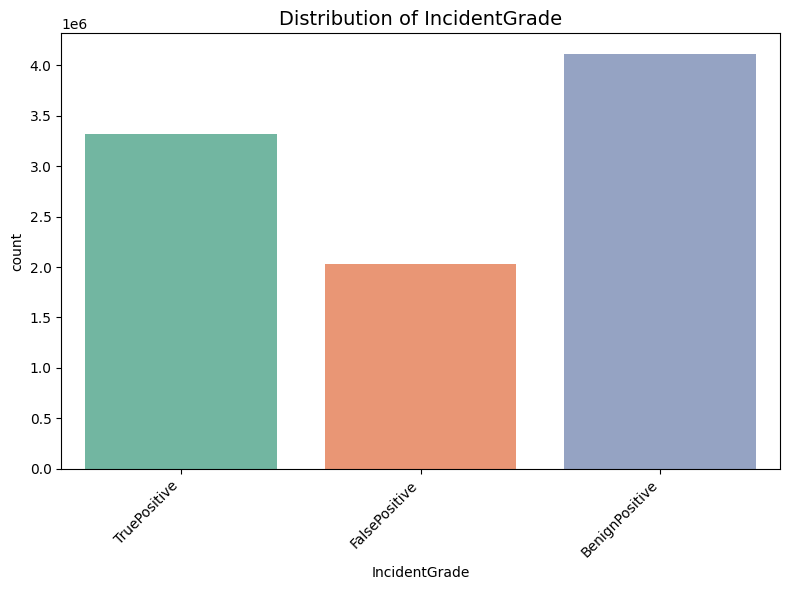

In [26]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Set figure size for better visualization
plt.figure(figsize=(8, 6))  # Adjust the figure size to make the plot smaller and more readable

# Step 2: Create a count plot for the target variable 'IncidentGrade'
sns.countplot(x='IncidentGrade', data=df, palette='Set2')  # Use a palette to make the plot more visually appealing

# Step 3: Add a title to the plot
plt.title('Distribution of IncidentGrade', fontsize=14)  # Set title with a readable font size

# Step 4: Adjust x-axis labels to be more readable if they are long
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Step 5: Display the plot
plt.tight_layout()  # Ensure everything fits into the plot area neatly
plt.show()  # Display the plot

# Correlation Analysis
For numerical features, it's important to check for correlations between variables.

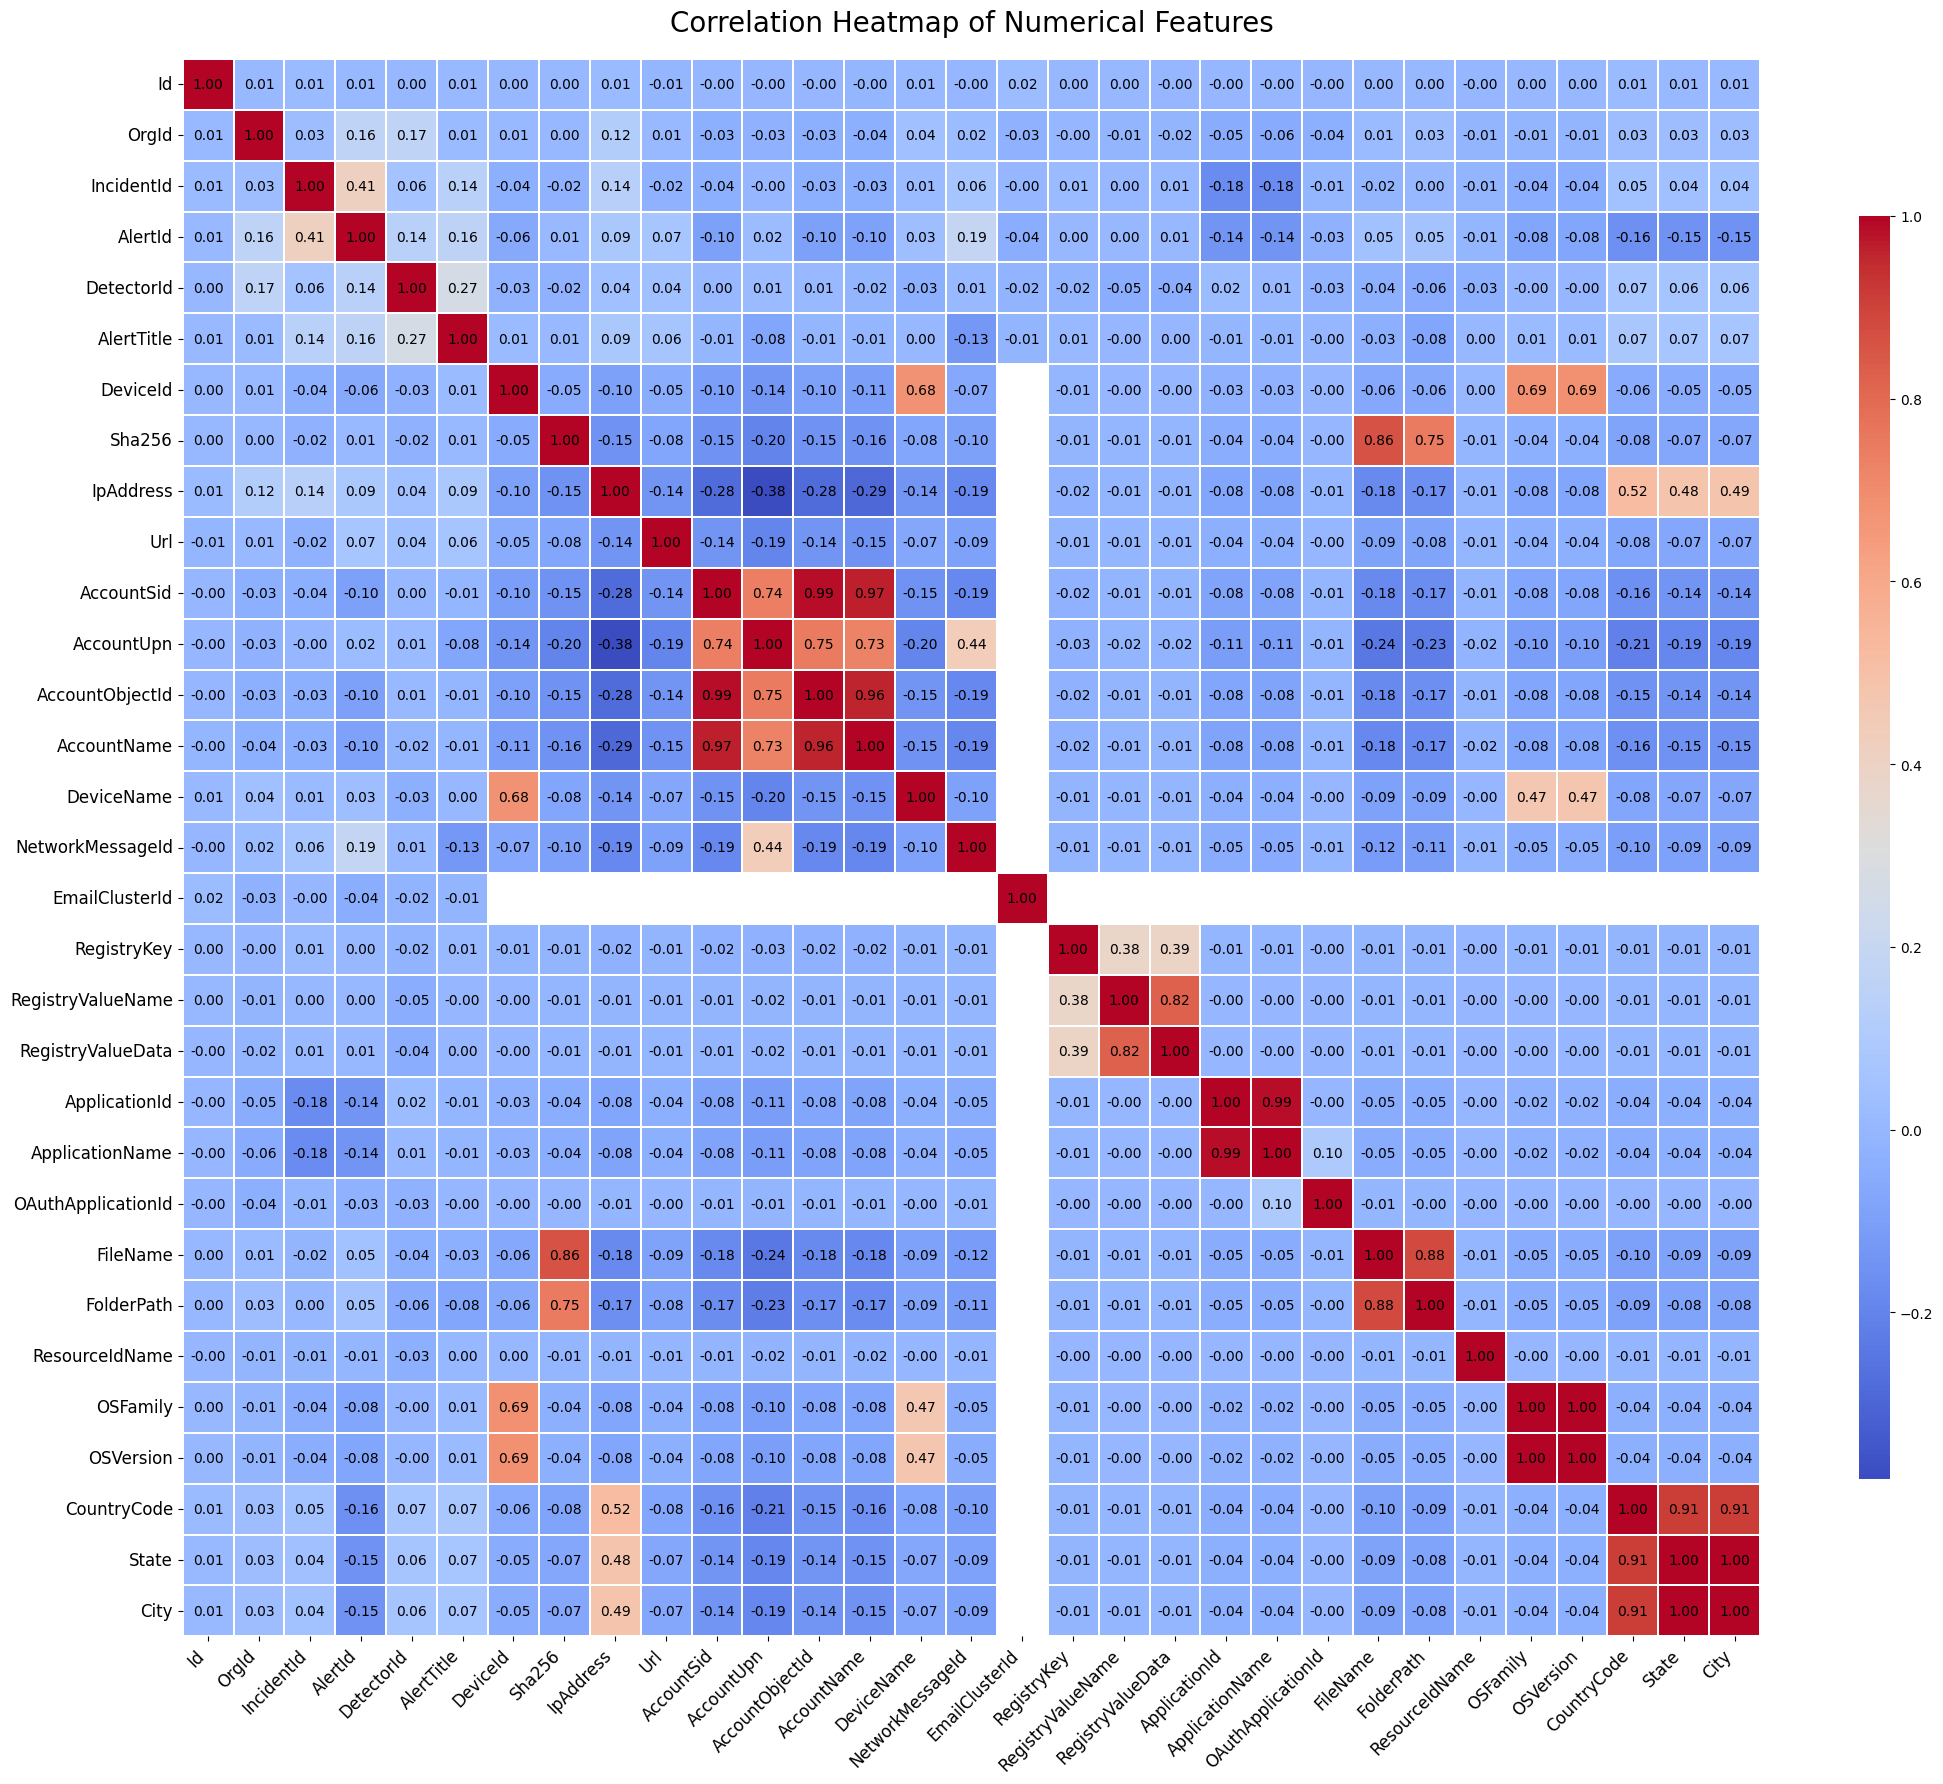

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis, capturing any numeric data types
numerical_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix for numerical features
corr_matrix = numerical_cols.corr()

# Plot the heatmap with enhanced readability
plt.figure(figsize=(22, 18))  # Slightly larger figure size for enhanced readability
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            annot_kws={"size": 10, "color": "black"},  # Optimized annotation size and color for readability
            linewidths=1.2,  # Moderate line width for separation
            square=True,     # Square cells for uniform layout
            cbar_kws={"shrink": 0.8, "aspect": 40})  # Adjusted color bar size and aspect for balance
plt.title('Correlation Heatmap of Numerical Features', fontsize=20, pad=20)  # Larger title font and padding
plt.xticks(rotation=45, ha='right', fontsize=12)  # Angled x-ticks for clarity
plt.yticks(rotation=0, fontsize=12)  # Horizontal y-ticks for readability
plt.tight_layout(pad=2)  # Slight padding for a neat layout
plt.show()

# Data Preprocessing
**Handling Missing Data**

In [28]:
# Check for missing values in the training dataset (df)
missing_values_df = df.isnull().sum()  # Count missing values for each column in df
print("Missing values in df (training dataset):")
print(missing_values_df[missing_values_df > 0])  # Display columns with missing values in df

# Check for missing values in the testing dataset (df1)
missing_values_df1 = df1.isnull().sum()  # Count missing values for each column in df1
print("\nMissing values in df1 (testing dataset):")
print(missing_values_df1[missing_values_df1 > 0])  # Display columns with missing values in df1


Missing values in df (training dataset):
MitreTechniques      5468386
IncidentGrade          51340
ActionGrouped        9460773
ActionGranular       9460773
EmailClusterId       9420025
ThreatFamily         9441956
ResourceType         9509762
Roles                9298686
AntispamDirection    9339535
SuspicionLevel       8072708
LastVerdict          7282572
dtype: int64

Missing values in df1 (testing dataset):
MitreTechniques      2307104
ActionGrouped        4146079
ActionGranular       4146079
EmailClusterId       4106285
ThreatFamily         4116614
ResourceType         4144998
Roles                4039317
AntispamDirection    4071481
SuspicionLevel       3498157
LastVerdict          3155260
dtype: int64


**Percentage of Null Values**

In [29]:
# Calculate the percentage of null values in each column of the training dataset (df)
percent_null_df = (df.isnull().sum() / len(df)) * 100
print("Percentage of null values in df (training dataset):")
print(percent_null_df[percent_null_df > 0])  # Display columns with null values and their percentages in df

# Calculate the percentage of null values in each column of the testing dataset (df1)
percent_null_df1 = (df1.isnull().sum() / len(df1)) * 100
print("\nPercentage of null values in df1 (testing dataset):")
print(percent_null_df1[percent_null_df1 > 0])  # Display columns with null values and their percentages in df1


Percentage of null values in df (training dataset):
MitreTechniques      57.460120
IncidentGrade         0.539465
ActionGrouped        99.410897
ActionGranular       99.410897
EmailClusterId       98.982729
ThreatFamily         99.213173
ResourceType         99.925658
Roles                97.707736
AntispamDirection    98.136965
SuspicionLevel       84.825536
LastVerdict          76.523030
dtype: float64

Percentage of null values in df1 (testing dataset):
MitreTechniques      55.619779
ActionGrouped        99.953881
ActionGranular       99.953881
EmailClusterId       98.994526
ThreatFamily         99.243538
ResourceType         99.927820
Roles                97.380058
AntispamDirection    98.155469
SuspicionLevel       84.333745
LastVerdict          76.067167
dtype: float64


# Drop columns with missing values in both df (training) and df1 (testing) datasets
I have removed the null values in the IncidentGrade column, which accounted for just 0.5% of the data, ensuring no significant impact on the overall data due to the large size of the dataset.(while maintaining data quality for analysis)

In [30]:
# Step 1: Define columns to be dropped due to missing values
columns_with_missing_values_df = ['MitreTechniques', 'ActionGrouped', 'ActionGranular',
                                  'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
                                  'SuspicionLevel', 'LastVerdict']

# Step 2: Drop specified columns with missing values in the training dataset (df)
df = df.drop(columns=columns_with_missing_values_df)  # Removes the columns listed in the variable

# Step 3: Print the shape of df after column removal to confirm the change
print("\nShape of df after dropping columns with missing values:", df.shape)

# Step 4: Drop specified columns with missing values in the testing dataset (df1)
df1 = df1.drop(columns=columns_with_missing_values_df)  # Removes the same columns from df1

# Step 5: Print the shape of df1 after column removal to confirm the change
print("Shape of df1 after dropping columns with missing values:", df1.shape)

# Step 6: Save the shape of df before dropping rows with null 'IncidentGrade' column
df_before_drop = df.shape  # Capture the number of rows and columns before the operation

# Step 7: Drop rows where 'IncidentGrade' column has null values
df = df.dropna(subset=['IncidentGrade'])  # Remove rows in df where 'IncidentGrade' is null

# Step 8: Print the shape of df before dropping rows with null 'IncidentGrade'
print("\nShape of df before dropping rows with null 'IncidentGrade':", df_before_drop)  # Display initial shape

# Step 9: Print the shape of df after dropping rows with null 'IncidentGrade'
print("Shape of df after dropping rows with null 'IncidentGrade':", df.shape)  # Display new shape after drop


Shape of df after dropping columns with missing values: (9516837, 35)
Shape of df1 after dropping columns with missing values: (4147992, 36)

Shape of df before dropping rows with null 'IncidentGrade': (9516837, 35)
Shape of df after dropping rows with null 'IncidentGrade': (9465497, 35)


In [31]:
print("\nColumn names in the dataset (train):")
print(df.columns)
print("\nColumn names in the dataset (test):")
print(df1.columns)


Column names in the dataset (train):
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

Column names in the dataset (test):
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'Re

# The null counts for the IncidentGrade column in both df and df1

In [32]:
# Check null count in the IncidentGrade column for df
null_count_df = df['IncidentGrade'].isnull().sum()
print(f"Null count in 'IncidentGrade' column of df: {null_count_df}")

# Check null count in the IncidentGrade column for df1
null_count_df1 = df1['IncidentGrade'].isnull().sum()
print(f"Null count in 'IncidentGrade' column of df1: {null_count_df1}")

Null count in 'IncidentGrade' column of df: 0
Null count in 'IncidentGrade' column of df1: 0


In [33]:
# train 
df.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [34]:
# test
df1.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

# Identify duplicates
**Count Duplicates in df and df1 (train and test)**

In [35]:
# Identify duplicates in df (Training Data)
duplicates_df = df[df.duplicated()]

# Identify duplicates in df1 (Testing Data)
duplicates_df1 = df1[df1.duplicated()]

# Print the number of duplicates in each dataset
print(f"Duplicates in df (Training Data): {duplicates_df.shape[0]}")
print(f"Duplicates in df1 (Testing Data): {duplicates_df1.shape[0]}")

Duplicates in df (Training Data): 542692
Duplicates in df1 (Testing Data): 225297


**Percentage of duplicated df and df1**

In [36]:
# Identify duplicates in df (Training Data)
duplicates_df = df[df.duplicated()]

# Identify duplicates in df1 (Testing Data)
duplicates_df1 = df1[df1.duplicated()]

# Calculate the percentage of duplicates in each dataset
percent_duplicates_df = (duplicates_df.shape[0] / df.shape[0]) * 100
percent_duplicates_df1 = (duplicates_df1.shape[0] / df1.shape[0]) * 100

# Print only the percentage of duplicates
print(f"Percentage of duplicates in df (Training Data): {percent_duplicates_df:.2f}%")
print(f"Percentage of duplicates in df1 (Testing Data): {percent_duplicates_df1:.2f}%")

Percentage of duplicates in df (Training Data): 5.73%
Percentage of duplicates in df1 (Testing Data): 5.43%


**Drop the duplicated rows df-train and df1-test**

In [37]:
# Step 1: Drop duplicates from df (Training Data)
df = df.drop_duplicates()  # Removes duplicate rows from df, default is to keep the first occurrence

# Step 2: Drop duplicates from df1 (Testing Data)
df1 = df1.drop_duplicates()  # Removes duplicate rows from df1, default is to keep the first occurrence

# Step 3: Verify if duplicates have been removed by checking the row counts
print(f"Rows in df (Training Data) after dropping duplicates: {df.shape[0]}")  # Prints the row count in df to confirm duplicates are dropped
print(f"Rows in df1 (Testing Data) after dropping duplicates: {df1.shape[0]}")  # Prints the row count in df1 to confirm duplicates are dropped

Rows in df (Training Data) after dropping duplicates: 8922805
Rows in df1 (Testing Data) after dropping duplicates: 3922695


In [38]:
# Display the shape of df (Training Data) and df1 (Testing Data)
print(f"Shape of df (Training Data): {df.shape}")  # Prints the dimensions of the training dataset
print(f"Shape of df1 (Testing Data): {df1.shape}")  # Prints the dimensions of the testing dataset

Shape of df (Training Data): (8922805, 35)
Shape of df1 (Testing Data): (3922695, 36)


**Check if the unique values in the 'IncidentGrade' column are the same in both df and df1**

In [39]:
# Check if the unique values in the 'IncidentGrade' column are the same in both df and df1
unique_train = set(df['IncidentGrade'].unique())
unique_test = set(df1['IncidentGrade'].unique())

# Compare the unique values
if unique_train == unique_test:
    print("Both training and testing datasets have the same unique values in 'IncidentGrade'.")
else:
    print("The training and testing datasets have different unique values in 'IncidentGrade'.")

Both training and testing datasets have the same unique values in 'IncidentGrade'.


# Feature Engineering

In [40]:
import pandas as pd  # Import pandas for data manipulation

# Assuming 'df' and 'df1' are your training and testing data

# Step 1: Convert timestamp columns to datetime format if not already in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Converts 'Timestamp' column in df to datetime format
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])  # Converts 'Timestamp' column in df1 to datetime format

# Step 2: Extract year from the timestamp
df['Year'] = df['Timestamp'].dt.year  # Creates a new 'Year' column in df, extracting the year from 'Timestamp'
df1['Year'] = df1['Timestamp'].dt.year  # Creates a new 'Year' column in df1, extracting the year from 'Timestamp'

# Step 3: Extract month from the timestamp
df['Month'] = df['Timestamp'].dt.month  # Creates a new 'Month' column in df, extracting the month from 'Timestamp'
df1['Month'] = df1['Timestamp'].dt.month  # Creates a new 'Month' column in df1, extracting the month from 'Timestamp'

# Step 4: Extract day of the month from the timestamp
df['Day'] = df['Timestamp'].dt.day  # Creates a new 'Day' column in df, extracting the day of the month from 'Timestamp'
df1['Day'] = df1['Timestamp'].dt.day  # Creates a new 'Day' column in df1, extracting the day of the month from 'Timestamp'

# Step 5: Extract hour from the timestamp
df['Hour'] = df['Timestamp'].dt.hour  # Creates a new 'Hour' column in df, extracting the hour from 'Timestamp'
df1['Hour'] = df1['Timestamp'].dt.hour  # Creates a new 'Hour' column in df1, extracting the hour from 'Timestamp'

# Step 6: Extract weekday (Week of the Day) from the timestamp
df['Weekday'] = df['Timestamp'].dt.weekday  # Extracts the weekday from 'Timestamp' and creates a 'Weekday' column in df
df1['Weekday'] = df1['Timestamp'].dt.weekday  # Extracts the weekday from 'Timestamp' and creates a 'Weekday' column in df1

# Step 7: Print first few rows to confirm changes
print("Training Data (df) after extracting year, month, day, hour, and weekday:")
print(df.head().to_string())  # Prints the first few rows of the df dataset with the new features

print("\nTesting Data (df1) after extracting year, month, day, hour, and weekday:")
print(df1.head().to_string())  # Prints the first few rows of the df1 dataset with the new features

# Step 8: Drop the original 'Timestamp' column if it exists
if 'Timestamp' in df.columns:
    df.drop('Timestamp', axis=1, inplace=True)  # Drops 'Timestamp' from df
else:
    print("Column 'Timestamp' not found in df.")

if 'Timestamp' in df1.columns:
    df1.drop('Timestamp', axis=1, inplace=True)  # Drops 'Timestamp' from df1
else:
    print("Column 'Timestamp' not found in df1.")

# Step 9: Print the data after dropping the 'Timestamp' column
print("\nTraining Data (df) after dropping 'Timestamp':")
print(df.head().to_string())  # Prints the first few rows of the df dataset without the 'Timestamp' column

print("\nTesting Data (df1) after dropping 'Timestamp':")
print(df1.head().to_string())  # Prints the first few rows of the df1 dataset without the 'Timestamp' column

Training Data (df) after extracting year, month, day, hour, and weekday:
              Id  OrgId  IncidentId  AlertId                 Timestamp  DetectorId  AlertTitle           Category   IncidentGrade EntityType EvidenceRole  DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  AccountName  DeviceName  NetworkMessageId  RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId  FileName  FolderPath  ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  Year  Month  Day  Hour  Weekday
0   180388628218      0         612   123247 2024-06-04 06:05:15+00:00           7           6      InitialAccess    TruePositive         Ip      Related     98799  138268         27  160396      441377      673934           425863       453297      153085            529644         1631                635                860           2251             3421                 881    289573      117668            3586         5     

In [41]:
# Display the shape of df (Training Data) and df1 (Testing Data)
print(f"Shape of df (Training Data): {df.shape}")  # Prints the dimensions of the training dataset
print(f"Shape of df1 (Testing Data): {df1.shape}")  # Prints the dimensions of the testing dataset

Shape of df (Training Data): (8922805, 39)
Shape of df1 (Testing Data): (3922695, 40)


In [42]:
print("\nData types of each column (train):")
print(df.dtypes)         #    ----- or use info()


Data types of each column (train):
Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId               int64
Sha256                 int64
IpAddress              int64
Url                    int64
AccountSid             int64
AccountUpn             int64
AccountObjectId        int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueName      int64
RegistryValueData      int64
ApplicationId          int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
FolderPath             int64
ResourceIdName         int64
OSFamily               int64
OSVersion              int64
CountryCode            int64
State                  int64
City   

In [43]:
print("\nData types of each column (test):")
print(df1.dtypes)         #    ----- or use info()


Data types of each column (test):
Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId               int64
Sha256                 int64
IpAddress              int64
Url                    int64
AccountSid             int64
AccountUpn             int64
AccountObjectId        int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueName      int64
RegistryValueData      int64
ApplicationId          int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
FolderPath             int64
ResourceIdName         int64
OSFamily               int64
OSVersion              int64
CountryCode            int64
State                  int64
City    

In [44]:
# Display the first few rows of the DataFrame as a string
print(df.head().to_string(index=False))

           Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle          Category  IncidentGrade EntityType EvidenceRole  DeviceId  Sha256  IpAddress    Url  AccountSid  AccountUpn  AccountObjectId  AccountName  DeviceName  NetworkMessageId  RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId  FileName  FolderPath  ResourceIdName  OSFamily  OSVersion  CountryCode  State  City  Year  Month  Day  Hour  Weekday
 180388628218      0         612   123247           7           6     InitialAccess   TruePositive         Ip      Related     98799  138268         27 160396      441377      673934           425863       453297      153085            529644         1631                635                860           2251             3421                 881    289573      117668            3586         5         66           31      6     3  2024      6    4     6        1
 455266534868     88         326   210035          58          43      E

# Exploratory Data Analysis (EDA) ---(After)
**Statistical Summary**

In [45]:
# Summary Statistics for Train and Test Data
print("\nSummary statistics for numerical variables (train):")
print(df.describe().to_string())
#print("\nSummary statistics for numerical variables (test):")
#print(df1.describe().to_string())


Summary statistics for numerical variables (train):
                 Id         OrgId    IncidentId       AlertId    DetectorId    AlertTitle      DeviceId        Sha256     IpAddress           Url    AccountSid    AccountUpn  AccountObjectId   AccountName    DeviceName  NetworkMessageId   RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId      FileName    FolderPath  ResourceIdName      OSFamily     OSVersion   CountryCode         State          City          Year         Month           Day          Hour       Weekday
count  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06     8.922805e+06  8.922805e+06  8.922805e+06      8.922805e+06  8.922805e+06       8.922805e+06       8.922805e+06   8.922805e+06     8.922805e+06        8.922805e+06  8.922805e+06  8.922805e+06    8.922805e+06  8.922805e+06  8.922805e+06  8.922805

**Incidents per Year, Month, Day, Hour and Weekday**

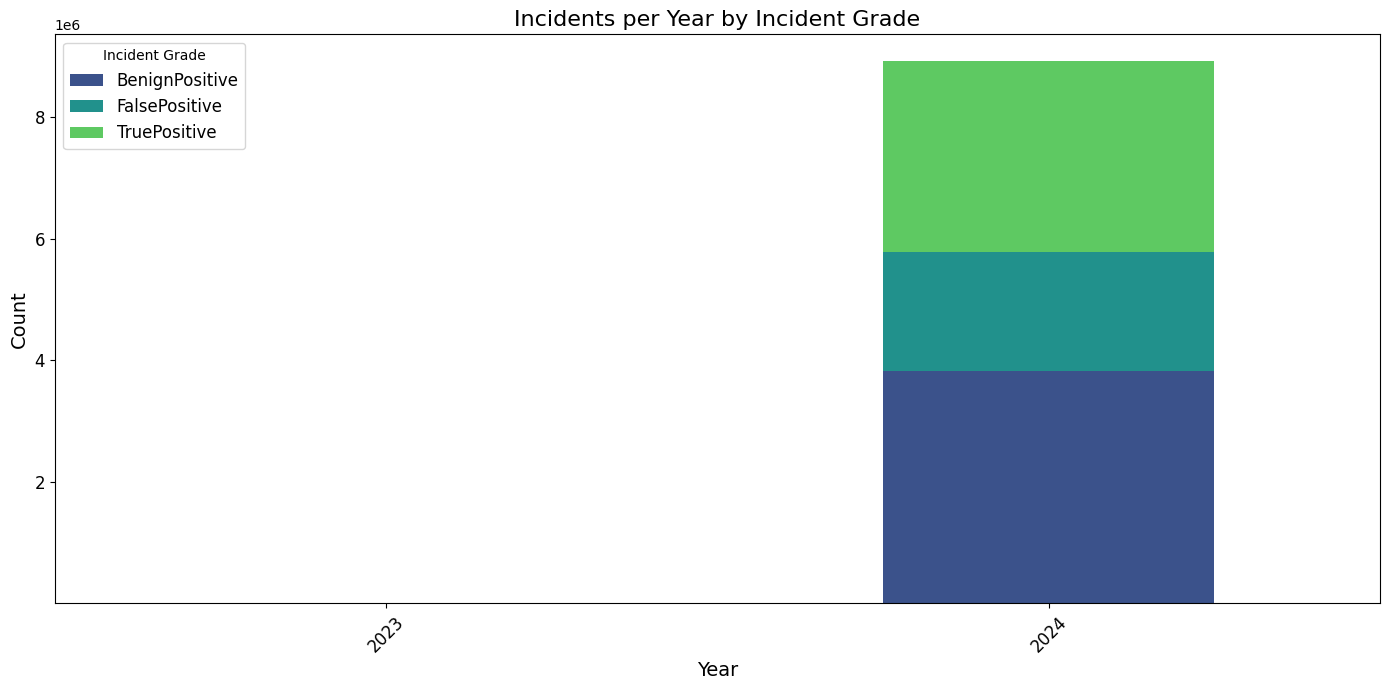

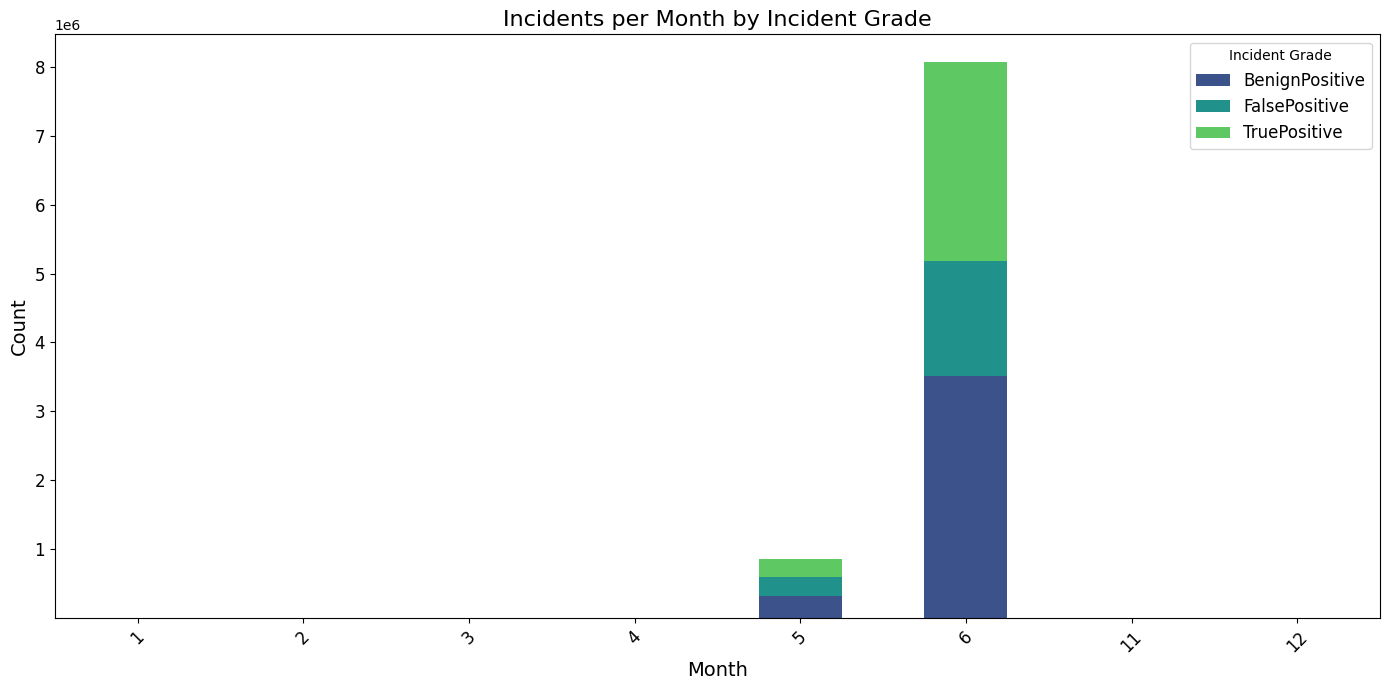

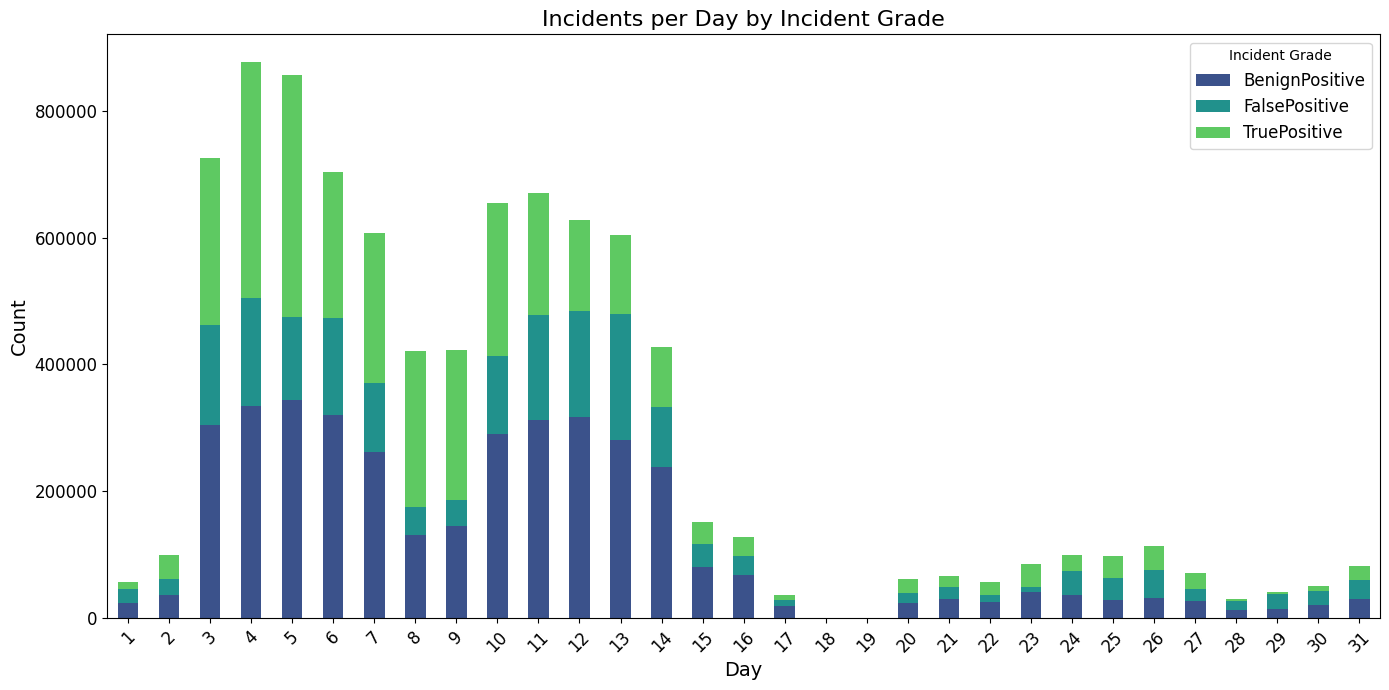

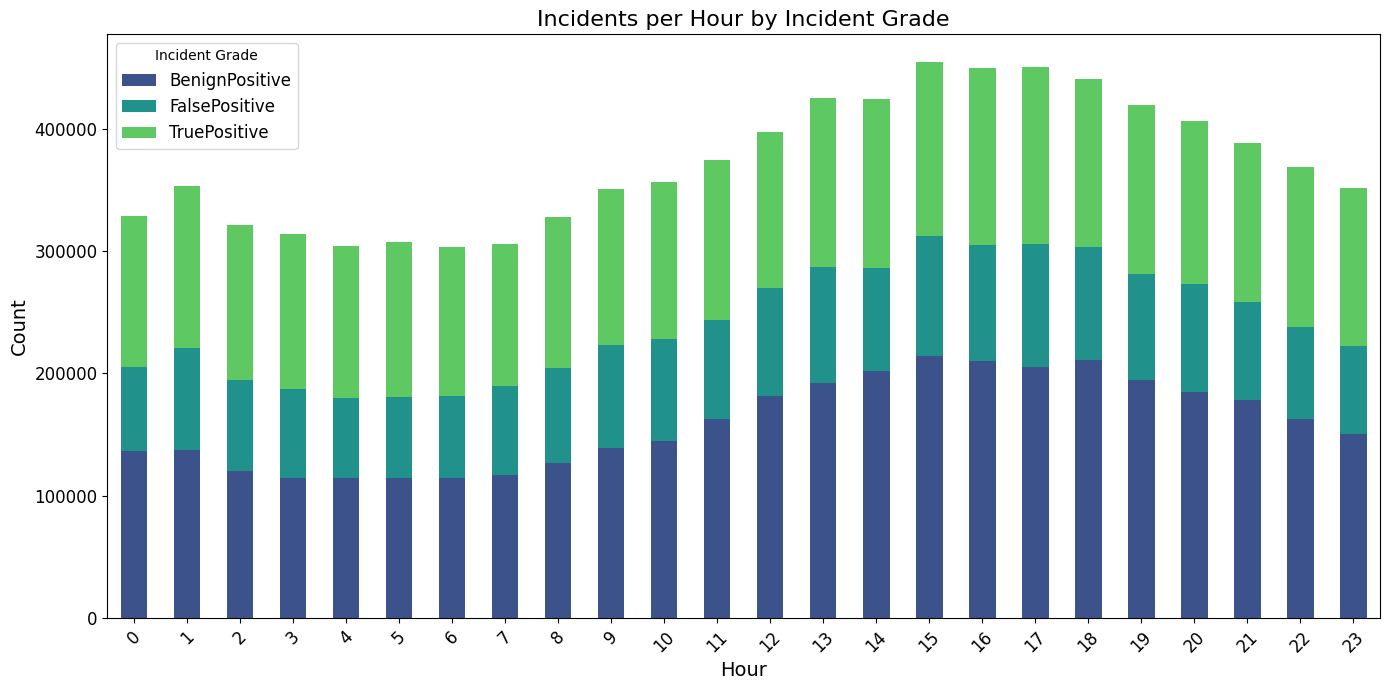

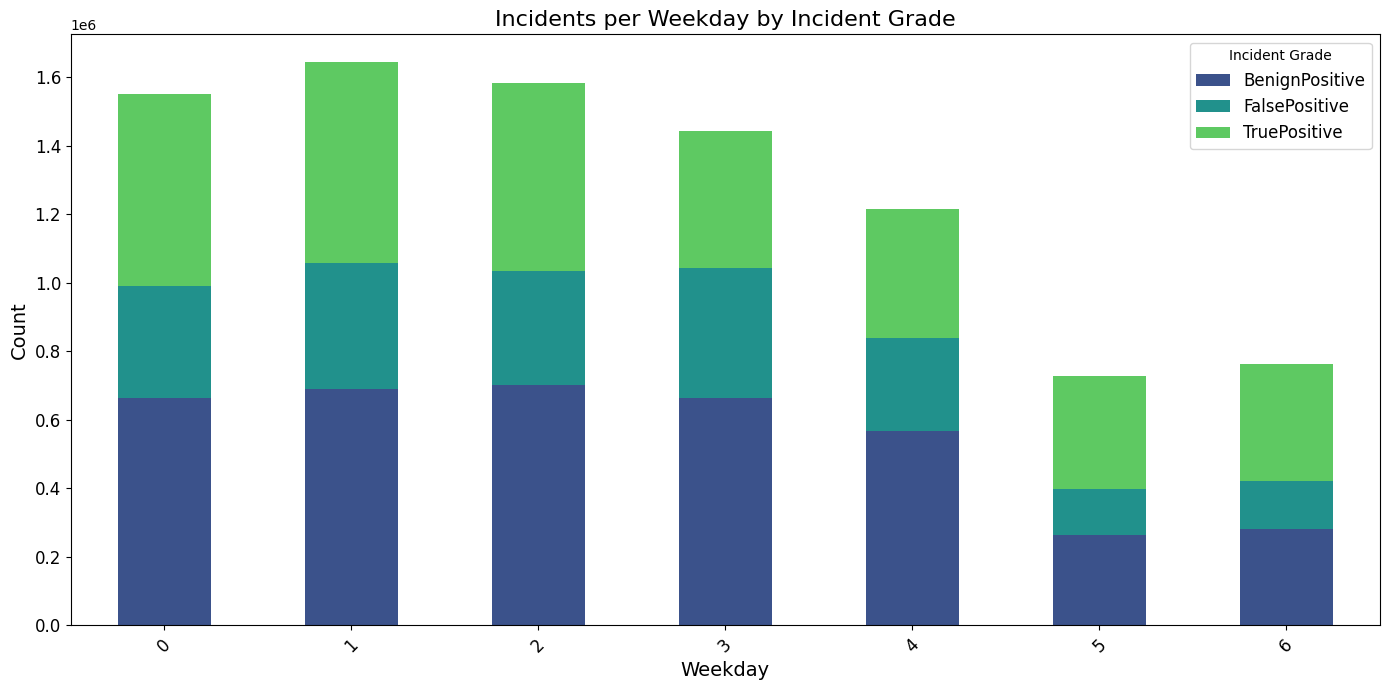

In [46]:
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for creating visualizations
import seaborn as sns  # Importing seaborn for enhanced visualizations

# Define the columns required for visualization
required_columns = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'IncidentGrade']

# Function to create a stacked bar chart
def plot_stacked_bar(x_col, title, xlabel, ylabel):
    if x_col in df.columns:  # Check if the specified column exists in the DataFrame
        # Create a cross-tabulation of the specified column against 'IncidentGrade'
        counts = pd.crosstab(df[x_col], df['IncidentGrade'])
        
        # Plot a stacked bar chart
        ax = counts.plot(
            kind='bar',  # Specify the type of plot as a bar chart
            stacked=True,  # Enable stacking for the bar chart
            color=sns.color_palette("viridis", len(counts.columns)),  # Use a color palette for bars
            figsize=(14, 7)  # Set the figure size
        )
        
        # Set the title of the chart
        plt.title(title, fontsize=16)
        
        # Set the label for the x-axis
        plt.xlabel(xlabel, fontsize=14)
        
        # Set the label for the y-axis
        plt.ylabel(ylabel, fontsize=14)
        
        # Rotate and adjust the x-axis tick labels for better readability
        plt.xticks(rotation=45, fontsize=12)
        
        # Adjust the font size for the y-axis tick labels
        plt.yticks(fontsize=12)
        
        # Add a legend with a title and adjusted font size
        plt.legend(title="Incident Grade", fontsize=12)
        
        # Adjust the layout to ensure no overlapping elements
        plt.tight_layout()
        
        # Display the plot
        plt.show()

# Generate stacked bar charts for incidents by different time components
plot_stacked_bar('Year', "Incidents per Year by Incident Grade", "Year", "Count")  # For Year
plot_stacked_bar('Month', "Incidents per Month by Incident Grade", "Month", "Count")  # For Month
plot_stacked_bar('Day', "Incidents per Day by Incident Grade", "Day", "Count")  # For Day
plot_stacked_bar('Hour', "Incidents per Hour by Incident Grade", "Hour", "Count")  # For Hour
plot_stacked_bar('Weekday', "Incidents per Weekday by Incident Grade", "Weekday", "Count")  # For Weekday

# Class Distribution for Imbalance (Target Variable: IncidentGrade)
**Use bar plots for categorical distributions, particularly on target columns to detect class imbalances.**

Counts of IncidentGrade values:
     IncidentGrade    Count
0  BenignPositive  3827800
1    TruePositive  3140126
2   FalsePositive  1954879


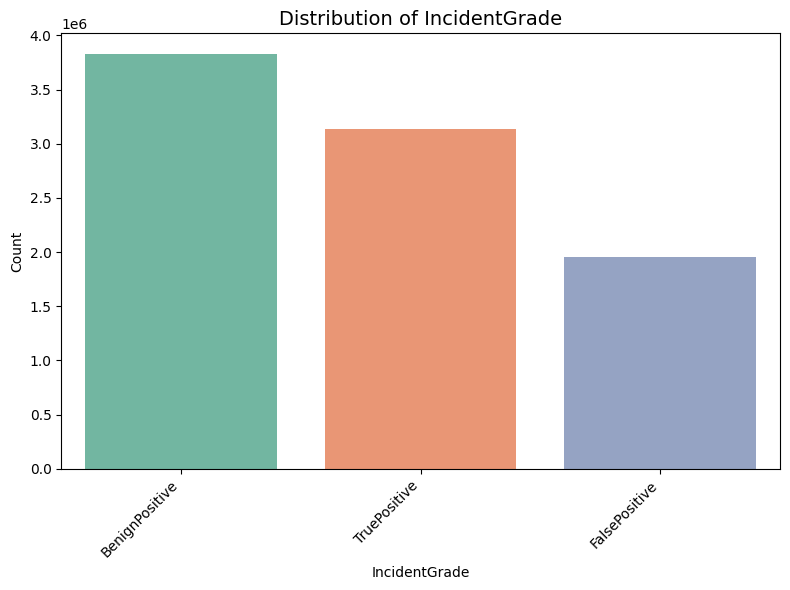

IncidentGrade
BenignPositive    42.899066
TruePositive      35.192140
FalsePositive     21.908794
Name: proportion, dtype: float64

In [47]:
import seaborn as sns  # Import seaborn for visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Count occurrences of each value in 'IncidentGrade' column and create DataFrame
incident_counts_df = df['IncidentGrade'].value_counts().reset_index(name='Count').rename(columns={'index': 'IncidentGrade'})  # Count and reset index

# Print the counts of each IncidentGrade
print("Counts of IncidentGrade values:\n", incident_counts_df)  # Print the counts

# Set plot size for better readability
plt.figure(figsize=(8, 6))  # Adjust figure size

# Create a bar plot of IncidentGrade counts, with hue for color differentiation
sns.barplot(x='IncidentGrade', y='Count', data=incident_counts_df, hue='IncidentGrade', palette='Set2')  # Bar plot with hue

# Add title and rotate x-axis labels for readability
plt.title('Distribution of IncidentGrade', fontsize=14)  # Title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Display the plot with proper layout
plt.tight_layout()  # Adjust layout for better fit
plt.show()  # Display plot

# Display the count for each class to measure imbalance
incident_counts = df['IncidentGrade'].value_counts(normalize=True) * 100
incident_counts

# Correlation Analysis
**For numerical features, it's important to check for correlations between variables.**

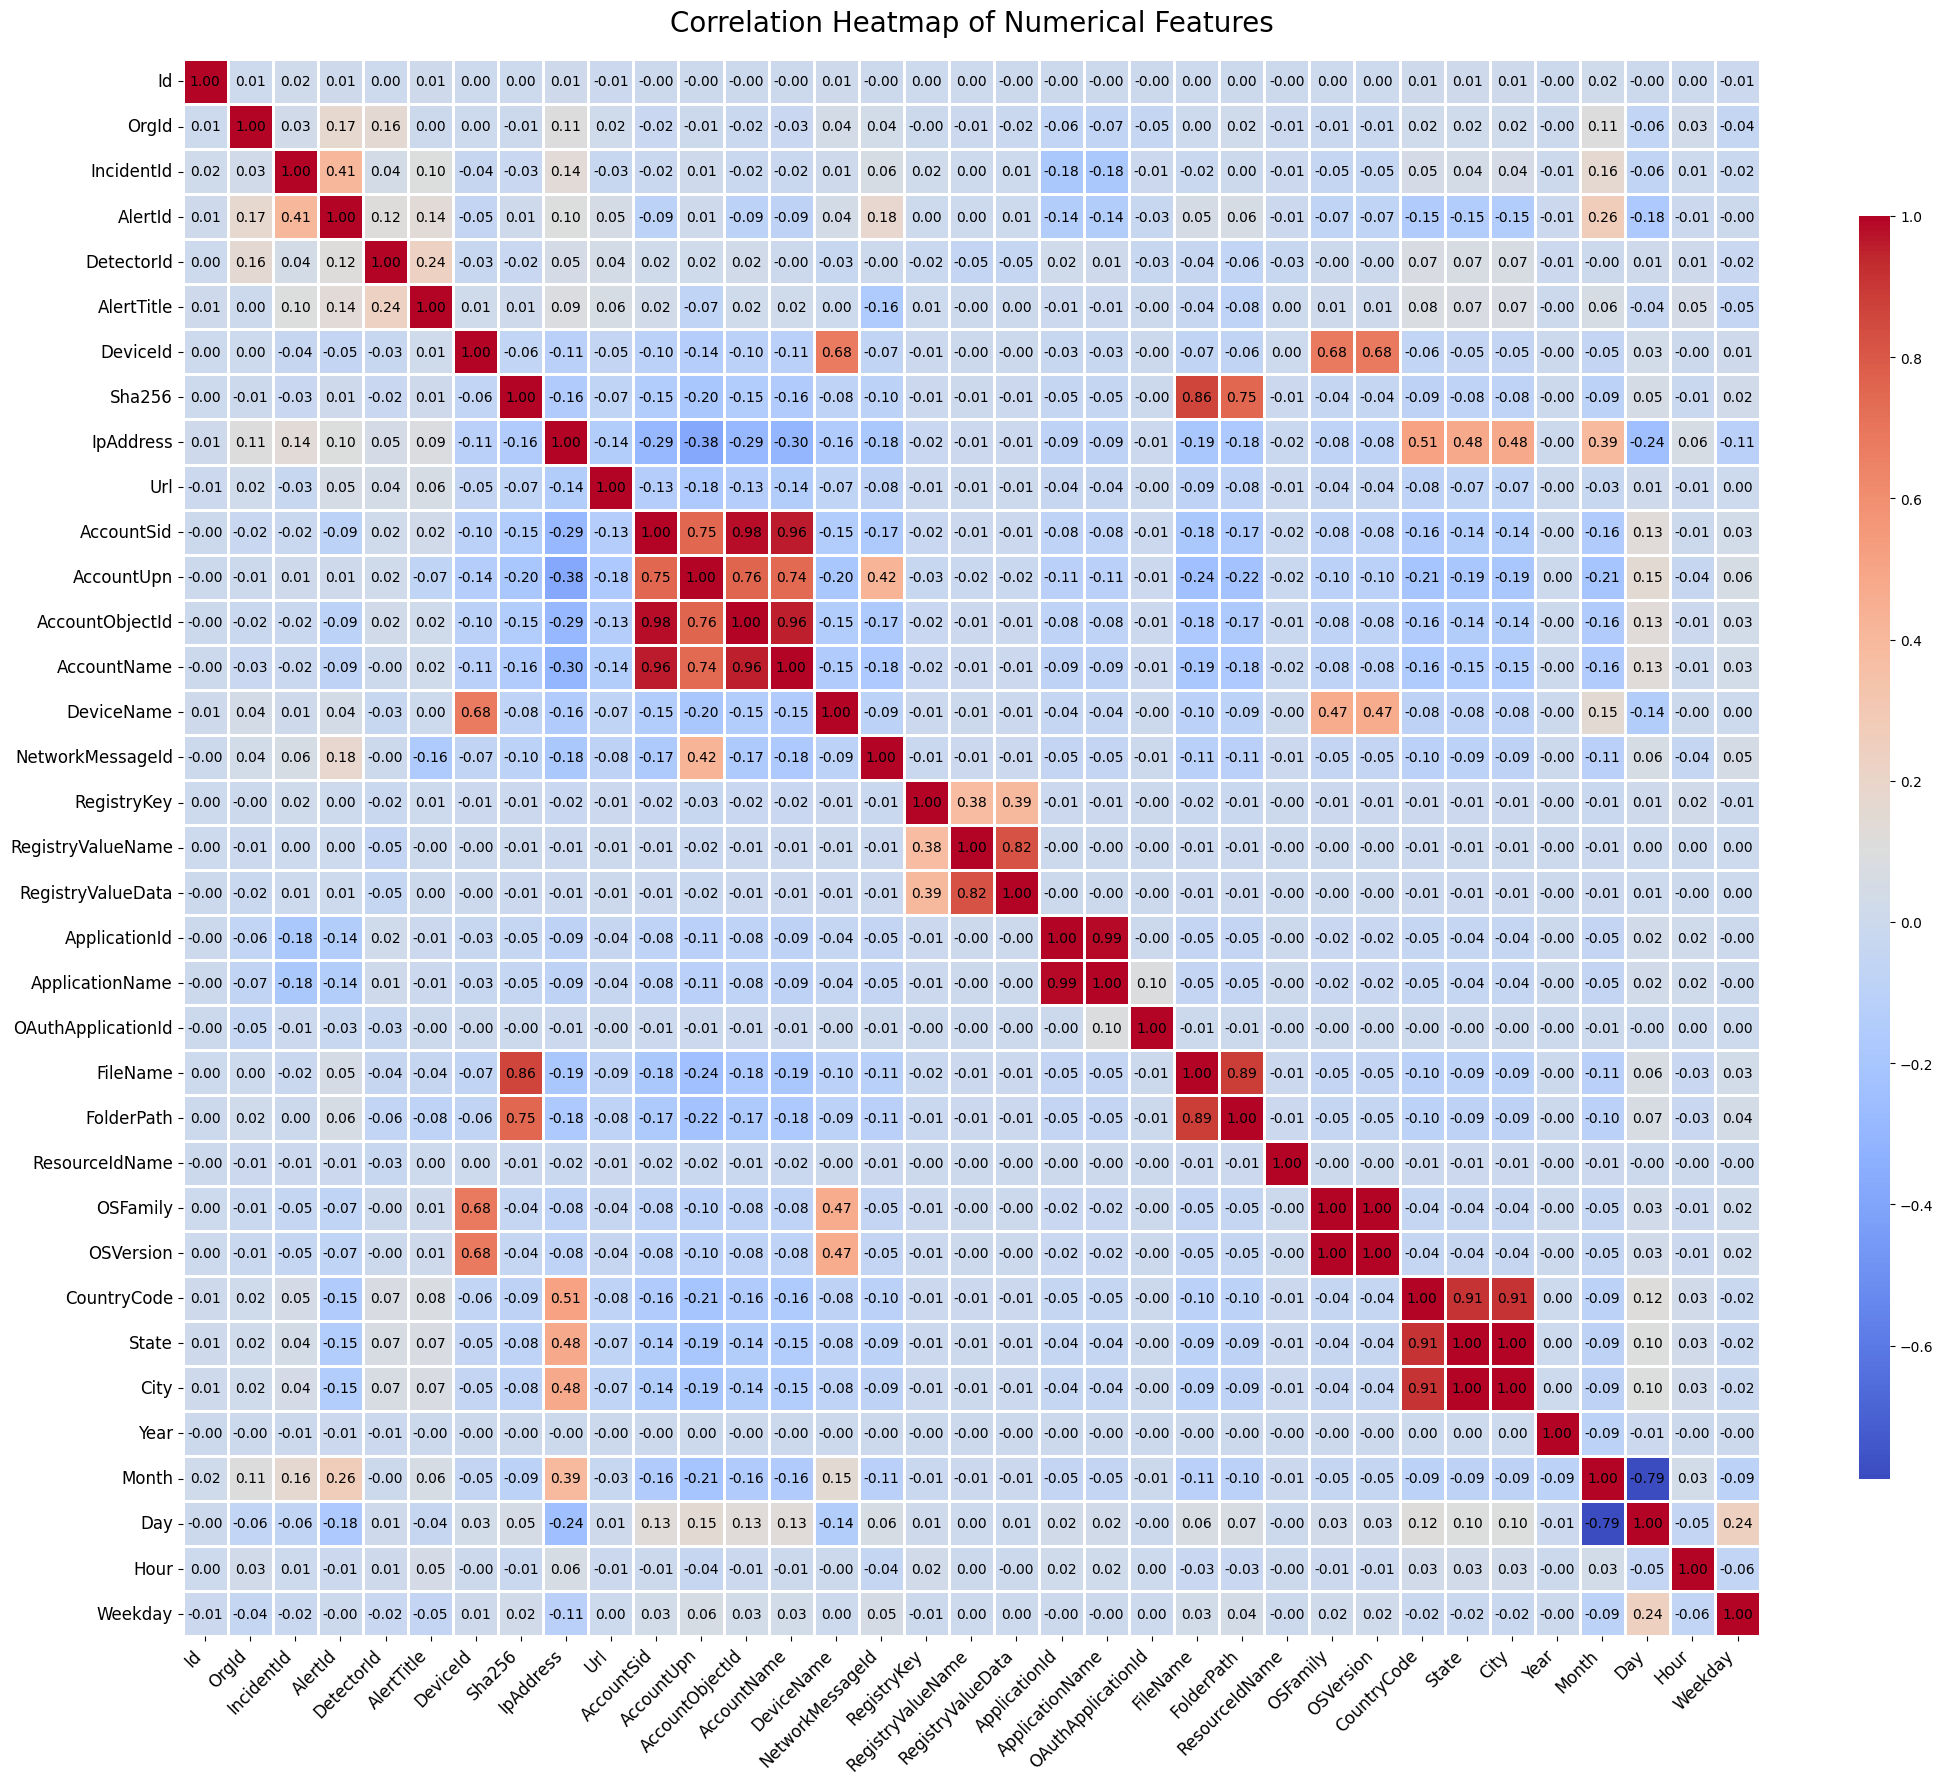

In [48]:
import seaborn as sns  # Import seaborn for advanced visualizations
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number'])  # Filter numeric columns

# Compute the correlation matrix (no absolute value)
corr_matrix = numerical_cols.corr()  # Calculate correlation matrix

# Plot heatmap with enhanced readability
plt.figure(figsize=(22, 18))  # Set figure size for larger heatmap

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10, "color": "black"}, 
            linewidths=0.8, square=True, cbar_kws={"shrink": 0.8, "aspect": 40})  # Plot heatmap with customization

# Title and axis label adjustments
plt.title('Correlation Heatmap of Numerical Features', fontsize=20, pad=20)  # Set title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal

# Adjust layout for neatness
plt.tight_layout(pad=2)  # Ensure no clipping

# Display the plot
plt.show()  # Show heatmap

**categorical columns to analyze**

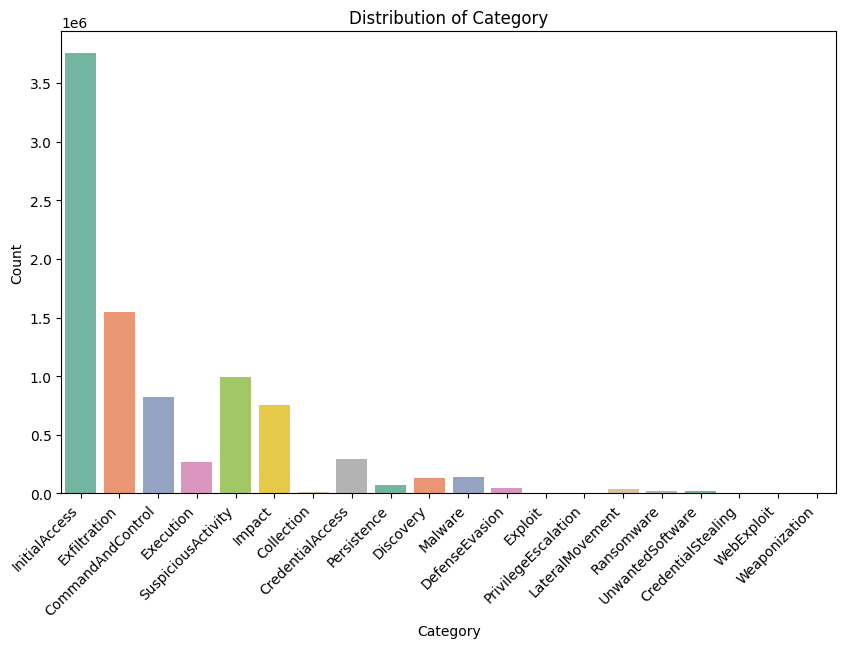

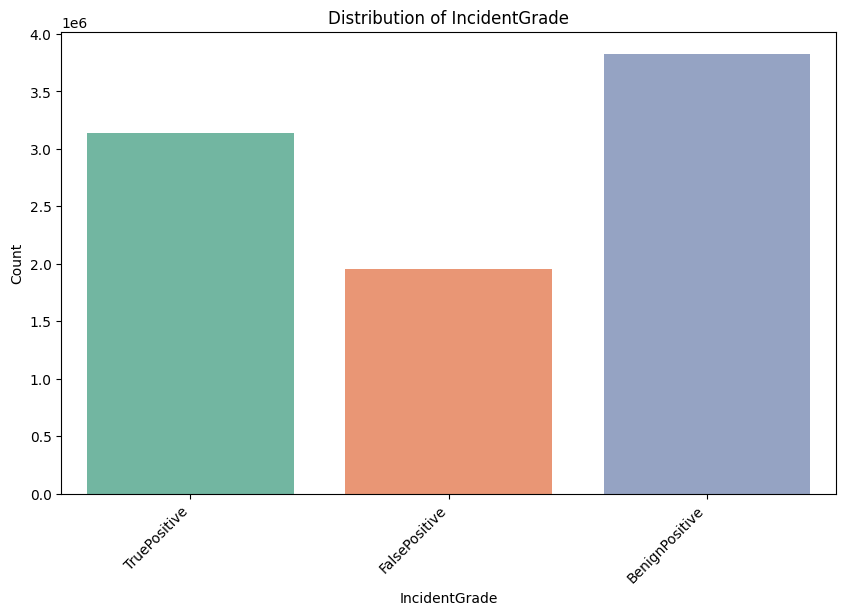

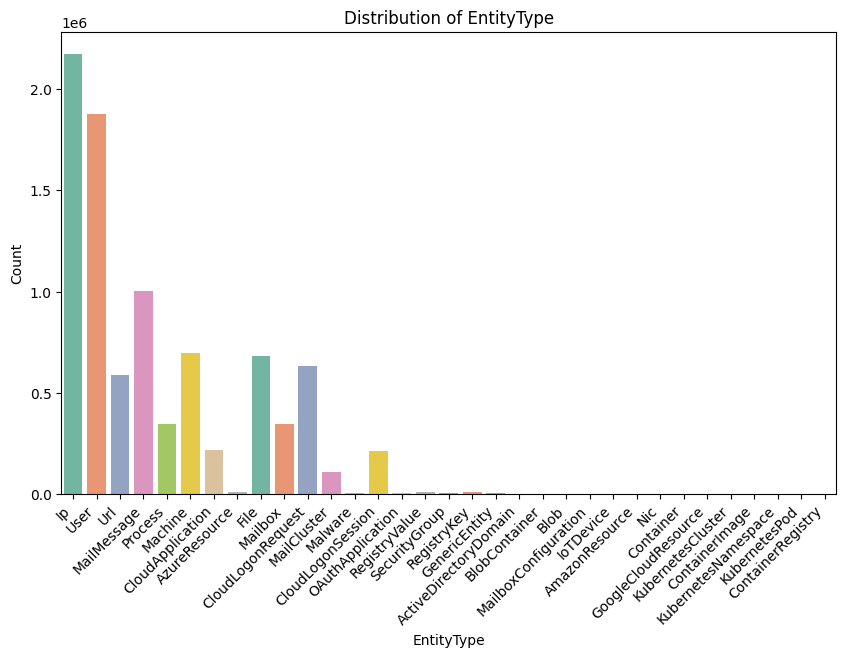

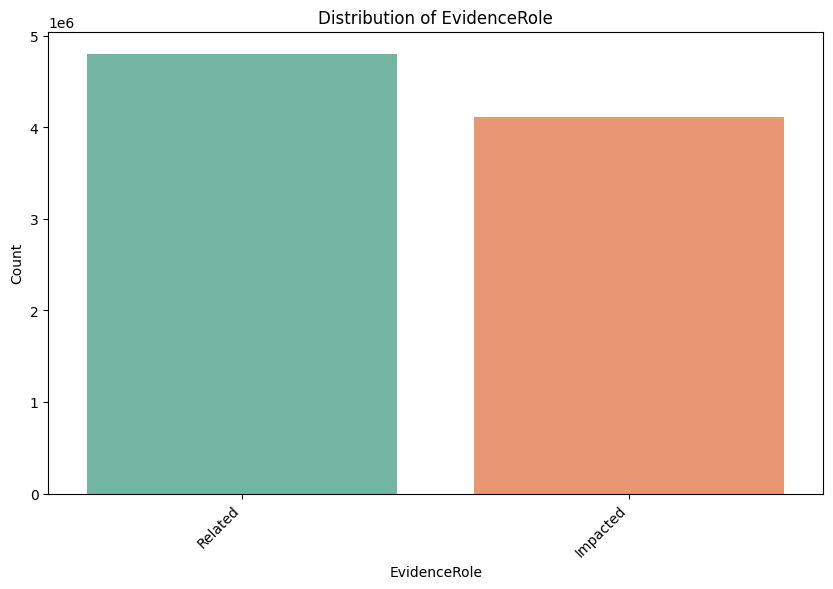

Frequency distribution for Category:
Category
InitialAccess          3752038
Exfiltration           1550701
SuspiciousActivity      992318
CommandAndControl       825580
Impact                  750847
CredentialAccess        297572
Execution               266733
Malware                 140821
Discovery               127918
Persistence              72444
DefenseEvasion           46224
LateralMovement          40103
UnwantedSoftware         18005
Ransomware               17377
Collection               14446
PrivilegeEscalation       4665
Exploit                   4583
CredentialStealing         386
WebExploit                  38
Weaponization                6
Name: count, dtype: int64


Frequency distribution for IncidentGrade:
IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64


Frequency distribution for EntityType:
EntityType
Ip                       2174998
User                     1879451
MailMessage              100

In [49]:
import matplotlib.pyplot as plt  # Import matplotlib for basic plotting
import seaborn as sns  # Import seaborn for advanced visualizations
import warnings  # Import warnings module to suppress specific warnings

# Suppress FutureWarnings from seaborn related to the palette and hue
warnings.simplefilter(action='ignore', category=FutureWarning)

# Function to plot the distribution of categorical columns
def plot_categorical_distribution(df, columns):
    for column in columns:  # Loop through each categorical column
        plt.figure(figsize=(10, 6))  # Set the figure size for better readability
        sns.countplot(data=df, x=column, palette="Set2", hue=None)  # Plot the count of each category in the column
        plt.title(f"Distribution of {column}")  # Set the plot title dynamically
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.ylabel('Count')  # Set the y-axis label as 'Count'
        plt.show()  # Display the plot

# List of categorical columns to analyze
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

# Call the function to plot the distribution of the categorical columns
plot_categorical_distribution(df, categorical_columns)

# Display frequency distribution for each categorical column
for column in categorical_columns:  # Loop through each column
    print(f"Frequency distribution for {column}:")  # Print column name
    print(df[column].value_counts())  # Print the count of each category in the column
    print("\n")  # Add a newline for better readability

# IQR (Interquartile Range) method to detect outliers

In [50]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Step 1: Ensure the DataFrame only contains numeric columns for the IQR calculation
numeric_df = df.select_dtypes(include=['number'])  # This filters for numeric columns

# Initialize an empty dictionary to store outliers information
outlier_summary = {}

# Loop through each numerical column
for col in numeric_df.columns:  # Use numeric_df.columns to loop over numerical columns
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Detect outliers (values below lower_threshold or above upper_threshold)
    outliers = df[(df[col] < lower_threshold) | (df[col] > upper_threshold)]
    
    # Store the count of outliers for the current column
    outlier_summary[col] = len(outliers)

# Convert the outlier summary to a DataFrame for better visualization
outlier_summary_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier Count'])

# Display the outlier summary for columns with outliers
print(outlier_summary_df[outlier_summary_df['Outlier Count'] > 0])

                Column  Outlier Count
1                OrgId        1097771
2           IncidentId        1112871
4           DetectorId        1260128
5           AlertTitle        1761435
6             DeviceId         360158
7               Sha256         726172
8            IpAddress        2171482
9                  Url         589433
10          AccountSid        2067293
12     AccountObjectId        2040504
13         AccountName        2179511
14          DeviceName         694448
15    NetworkMessageId         990506
16         RegistryKey          17524
17   RegistryValueName           4480
18   RegistryValueData           5406
19       ApplicationId         212889
20     ApplicationName         219191
21  OAuthApplicationId           2595
22            FileName        1021961
23          FolderPath         873072
24      ResourceIdName           8100
25            OSFamily         191900
26           OSVersion         191893
27         CountryCode         743853
28          

# the box plot visualization

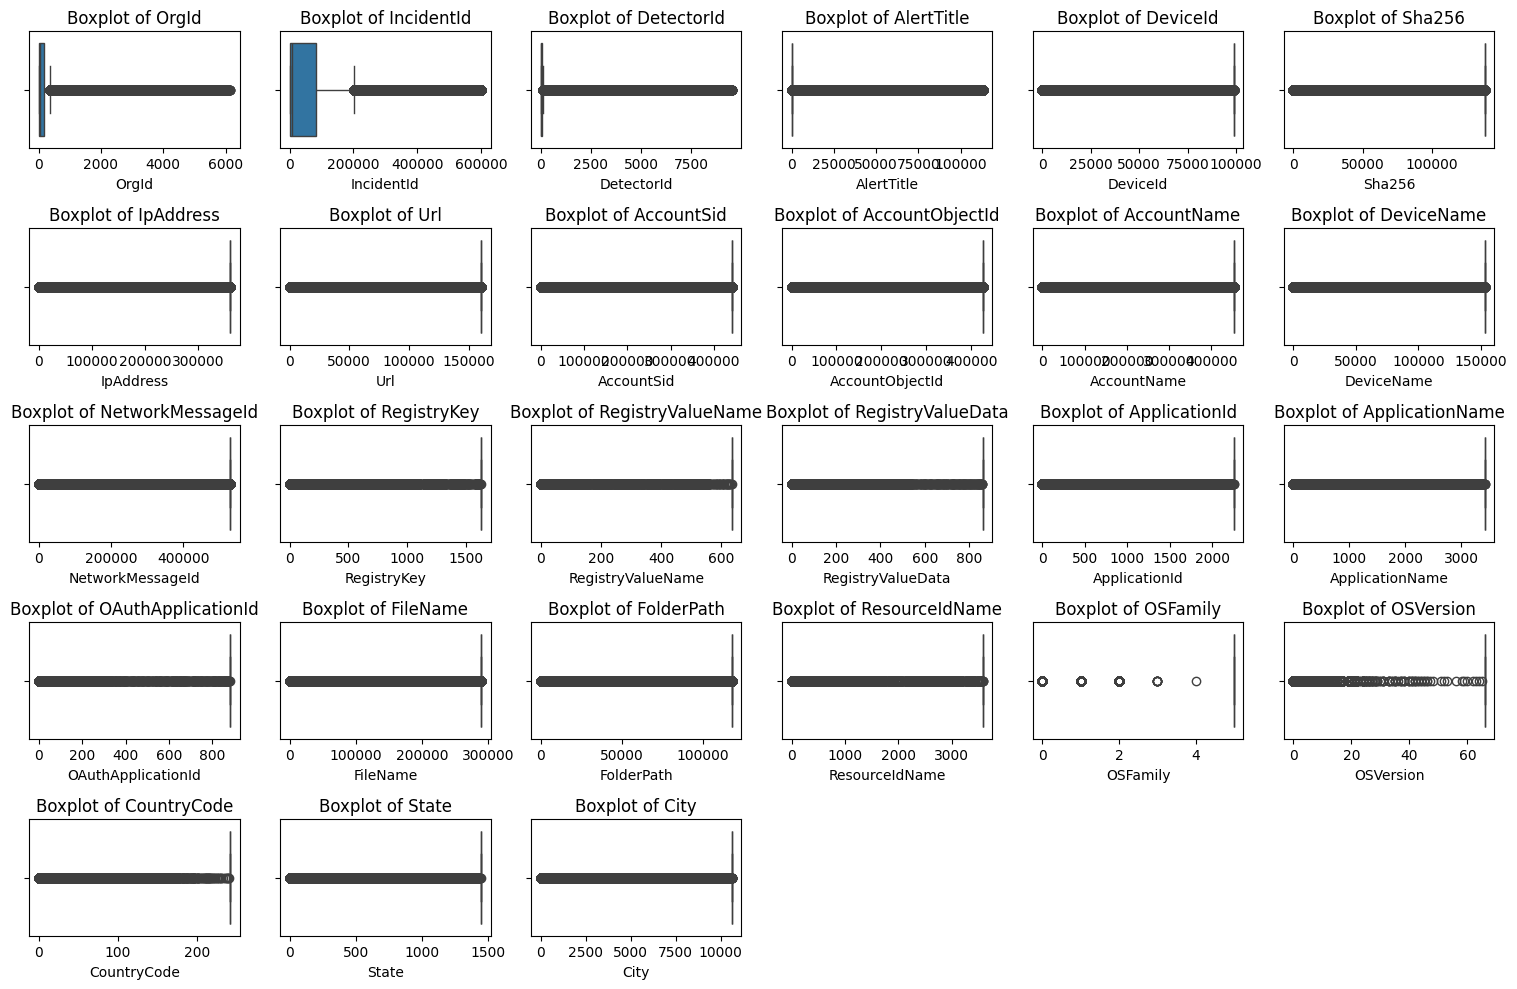

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns with outliers
outlier_columns = ['OrgId', 'IncidentId', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 
                   'IpAddress', 'Url', 'AccountSid', 'AccountObjectId', 'AccountName', 
                   'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 
                   'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
                   'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 
                   'CountryCode', 'State', 'City']

# Set up the plot grid
plt.figure(figsize=(15, 10))

# Create box plots for each column with outliers
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(5, 6, i)  # Grid of 5 rows and 6 columns
    sns.boxplot(x=df[col])  # Plot the box plot
    plt.title(f'Boxplot of {col}')  # Add title for each plot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plots


The code will calculate the IQR (Interquartile Range) for each column in the dataset, identify the outliers, cap them to the thresholds, and then print out the counts of outliers before and after capping.

In [52]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64','int32','float64']).columns

# Initialize dictionaries for outlier counts 
outlier_counts_before = {}
outlier_counts_after = {}

# Loop through all numerical columns
for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before capping
    outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts_before[col] = len(outliers_before)

    # Cap the column values
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Count outliers after capping
    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts_after[col] = len(outliers_after)

# Create a summary DataFrame
outlier_summary = pd.DataFrame({
    'Column': numerical_cols,
    'Outliers Before Capping': numerical_cols.map(outlier_counts_before),
    'Outliers After Capping': numerical_cols.map(outlier_counts_after)
})

# Display the outlier summary
print(outlier_summary)

                Column  Outliers Before Capping  Outliers After Capping
0                   Id                        0                       0
1                OrgId                  1097771                       0
2           IncidentId                  1112871                       0
3              AlertId                        0                       0
4           DetectorId                  1260128                       0
5           AlertTitle                  1761435                       0
6             DeviceId                   360158                       0
7               Sha256                   726172                       0
8            IpAddress                  2171482                       0
9                  Url                   589433                       0
10          AccountSid                  2067293                       0
11          AccountUpn                        0                       0
12     AccountObjectId                  2040504                 

In [53]:
# If AlertId should be an ID or categorical number, convert to integer
df['AlertId'] = df['AlertId'].round().astype('int64')

In [54]:
df.shape

(8922805, 39)

In [55]:
df.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
DetectorId              int64
AlertTitle            float64
Category               object
IncidentGrade          object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
FileName                int64
FolderPath              int64
ResourceIdName          int64
OSFamily                int64
OSVersion               int64
CountryCode             int64
State                   int64
City      

# CHI SQUARE TEST

In [56]:
import pandas as pd  # Import pandas for data manipulation

# Get value counts for each column and store them in variables
category_counts = df['Category'].value_counts()  # Count unique values in 'Category' column
incident_grade_counts = df['IncidentGrade'].value_counts()  # Count unique values in 'IncidentGrade' column
entity_type_counts = df['EntityType'].value_counts()  # Count unique values in 'EntityType' column
evidence_role_counts = df['EvidenceRole'].value_counts()  # Count unique values in 'EvidenceRole' column

# Display value counts for each column
print("Category Value Counts:")  # Print header for Category counts
print(category_counts)  # Print the count of unique values in 'Category'

print("\nIncidentGrade Value Counts:")  # Print header for IncidentGrade counts
print(incident_grade_counts)  # Print the count of unique values in 'IncidentGrade'

print("\nEntityType Value Counts:")  # Print header for EntityType counts
print(entity_type_counts)  # Print the count of unique values in 'EntityType'

print("\nEvidenceRole Value Counts:")  # Print header for EvidenceRole counts
print(evidence_role_counts)  # Print the count of unique values in 'EvidenceRole'

Category Value Counts:
Category
InitialAccess          3752038
Exfiltration           1550701
SuspiciousActivity      992318
CommandAndControl       825580
Impact                  750847
CredentialAccess        297572
Execution               266733
Malware                 140821
Discovery               127918
Persistence              72444
DefenseEvasion           46224
LateralMovement          40103
UnwantedSoftware         18005
Ransomware               17377
Collection               14446
PrivilegeEscalation       4665
Exploit                   4583
CredentialStealing         386
WebExploit                  38
Weaponization                6
Name: count, dtype: int64

IncidentGrade Value Counts:
IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

EntityType Value Counts:
EntityType
Ip                       2174998
User                     1879451
MailMessage              1004821
Machine                   696472
File  

In [57]:
import pandas as pd  # Import pandas for DataFrame manipulation
import scipy.stats as stats  # Import scipy for statistical tests

# Step 1: Create contingency tables for IncidentGrade vs EntityType and EvidenceRole
contingency_entitytype = pd.crosstab(df['IncidentGrade'], df['EntityType'])  # EntityType vs IncidentGrade
contingency_evidencerole = pd.crosstab(df['IncidentGrade'], df['EvidenceRole'])  # EvidenceRole vs IncidentGrade

# Step 2: Chi-Square Test for both variables
chi2_entitytype, p_entitytype, dof_entitytype, expected_entitytype = stats.chi2_contingency(contingency_entitytype)  # EntityType test
chi2_evidencerole, p_evidencerole, dof_evidencerole, expected_evidencerole = stats.chi2_contingency(contingency_evidencerole)  # EvidenceRole test

# Step 3: Display results for EntityType vs IncidentGrade
print(f"Chi2 Statistic: {chi2_entitytype}, P-Value: {p_entitytype}, Degrees of Freedom: {dof_entitytype}, Expected Frequencies: \n{expected_entitytype}")

# Step 4: Display results for EvidenceRole vs IncidentGrade
print(f"\nChi2 Statistic: {chi2_evidencerole}, P-Value: {p_evidencerole}, Degrees of Freedom: {dof_evidencerole}, Expected Frequencies: \n{expected_evidencerole}")

# Step 5: Interpret results for EntityType vs IncidentGrade
print("\nSignificant relationship" if p_entitytype < 0.05 else "\nNo significant relationship")  # EntityType interpretation

# Step 6: Interpret results for EvidenceRole vs IncidentGrade
print("\nSignificant relationship" if p_evidencerole < 0.05 else "\nNo significant relationship")  # EvidenceRole interpretation


Chi2 Statistic: 1778111.9892853934, P-Value: 0.0, Degrees of Freedom: 64, Expected Frequencies: 
[[4.71889725e+00 2.57394396e+00 3.47482434e+03 1.12824543e+02
  1.31271142e+02 9.30038880e+04 2.71337879e+05 9.03265573e+04
  8.57981319e-01 8.57981319e-01 8.57981319e-01 2.92605520e+05
  1.84208589e+03 4.28990659e+00 1.32987104e+01 9.33053826e+05
  8.57981319e-01 8.57981319e-01 8.57981319e-01 2.98779982e+05
  4.58093386e+04 4.31058823e+05 1.48213699e+05 9.69518890e+01
  1.10679590e+03 2.10205423e+01 1.11323076e+03 1.48031378e+05
  3.12176503e+03 4.80855630e+03 6.46488924e+02 2.52806340e+05
  8.06266924e+05]
 [2.40996738e+00 1.31452766e+00 1.77461234e+03 5.76201292e+01
  6.70409108e+01 4.74976089e+04 1.38573782e+05 4.61302811e+04
  4.38175888e-01 4.38175888e-01 4.38175888e-01 1.49435286e+05
  9.40763630e+02 2.19087944e+00 6.79172626e+00 4.76515839e+05
  4.38175888e-01 4.38175888e-01 4.38175888e-01 1.52588618e+05
  2.33950870e+04 2.20144167e+05 7.56935700e+04 4.95138753e+01
  5.65246895e+02 

In [58]:
import pandas as pd
import scipy.stats as stats

# Function to perform Chi-Square Test and display results
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])  # Create contingency table
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)  # Perform Chi-Square test
    print(f"Chi-Square Test for '{col1}' and '{col2}':\nChi2 Stat: {chi2_stat}, P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")  # Display degrees of freedom
    print(f"Expected Frequencies:\n{expected}\n")  # Display expected frequencies
    if p_val < 0.05:
        print(f"Significant association between '{col1}' and '{col2}'.")  # Reject null hypothesis
    else:
        print(f"No significant association between '{col1}' and '{col2}'.")  # Fail to reject null hypothesis

# Perform Chi-Square tests for specific column pairs
chi_square_test(df, 'IncidentGrade', 'EntityType')  # Test between IncidentGrade and EntityType
chi_square_test(df, 'IncidentGrade', 'EvidenceRole')  # Test between IncidentGrade and EvidenceRole

Chi-Square Test for 'IncidentGrade' and 'EntityType':
Chi2 Stat: 1778111.9892853934, P-value: 0.0
Degrees of Freedom: 64
Expected Frequencies:
[[4.71889725e+00 2.57394396e+00 3.47482434e+03 1.12824543e+02
  1.31271142e+02 9.30038880e+04 2.71337879e+05 9.03265573e+04
  8.57981319e-01 8.57981319e-01 8.57981319e-01 2.92605520e+05
  1.84208589e+03 4.28990659e+00 1.32987104e+01 9.33053826e+05
  8.57981319e-01 8.57981319e-01 8.57981319e-01 2.98779982e+05
  4.58093386e+04 4.31058823e+05 1.48213699e+05 9.69518890e+01
  1.10679590e+03 2.10205423e+01 1.11323076e+03 1.48031378e+05
  3.12176503e+03 4.80855630e+03 6.46488924e+02 2.52806340e+05
  8.06266924e+05]
 [2.40996738e+00 1.31452766e+00 1.77461234e+03 5.76201292e+01
  6.70409108e+01 4.74976089e+04 1.38573782e+05 4.61302811e+04
  4.38175888e-01 4.38175888e-01 4.38175888e-01 1.49435286e+05
  9.40763630e+02 2.19087944e+00 6.79172626e+00 4.76515839e+05
  4.38175888e-01 4.38175888e-01 4.38175888e-01 1.52588618e+05
  2.33950870e+04 2.20144167e+05 7

# Encoding Categorical Variables

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder dictionary to store encoders for each column
label_encoders = {}

# Step 1: Encode target variable ('IncidentGrade') in df
label_encoder = LabelEncoder()
df['IncidentGrade'] = label_encoder.fit_transform(df['IncidentGrade'])
label_encoders['IncidentGrade'] = label_encoder  # Save the LabelEncoder for 'IncidentGrade'

# Step 2: Label Encode categorical features in df
categorical_columns = ['Category', 'EntityType', 'EvidenceRole']  # Add the actual column names here

# Loop through each column in the list of categorical columns
for col in categorical_columns:
    le = LabelEncoder()  # Create a LabelEncoder for the current column
    df[col] = le.fit_transform(df[col])  # Transform the column values into numeric labels
    label_encoders[col] = le  # Save the LabelEncoder in the dictionary for future use

# Step 3: Encode the 'Usage' column in df1 if it exists
if 'Usage' in df1.columns:  # Check if 'Usage' exists in df1
    usage_encoder = LabelEncoder()  # Create a LabelEncoder for 'Usage'
    df1['Usage'] = usage_encoder.fit_transform(df1['Usage'])  # Transform the 'Usage' column
    label_encoders['Usage'] = usage_encoder  # Save the LabelEncoder for 'Usage'

# Step 4: Label Encode categorical columns in df1 that exist in df
categorical_columns_df1 = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

# Loop through each column and check if it exists in df1
for col in categorical_columns_df1:
    if col in df1.columns:
        le = label_encoders[col] if col in label_encoders else LabelEncoder()  # Reuse encoder from df or create new one
        df1[col] = le.fit_transform(df1[col])  # Apply the transformation
        label_encoders[col] = le  # Save the LabelEncoder in the dictionary for future use

# Display the first few rows of the DataFrames after encoding
print("df after encoding:")
print(df.head().to_string())
print("\ndf1 after encoding:")
print(df1.head().to_string())

df after encoding:
              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  Category  IncidentGrade  EntityType  EvidenceRole  DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  AccountName  DeviceName  NetworkMessageId  RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  OAuthApplicationId  FileName  FolderPath  ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  Year  Month   Day  Hour  Weekday
0   180388628218      0         612   123247           7         6.0        10              2          15             1     98799  138268     360606  160396      441377      673934           425863       453297      153085            529644         1631                635                860           2251             3421                 881    289573      117668            3586         5         66          242   1445  10630  2024      6   4.0     6        1
1   455266534868     88         326   210035         

In [63]:
# If AlertId should be an ID or categorical number, convert to integer
df['AlertTitle'] = df['AlertTitle'].round().astype('int64')
df['Day'] = df['Day'].round().astype('int64')

Save DataFrames as Pickle Files

In [64]:
# Save the DataFrame `df` as a pickle file named 'df.pkl'
df.to_pickle('df.pkl')

# Save the DataFrame `df1` as a pickle file named 'df1.pkl'
df1.to_pickle('df1.pkl')

print("DataFrames saved as pickle files successfully.")

DataFrames saved as pickle files successfully.
